In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_make import *
from solver import *
import solver
from plot_make import *
import importlib
importlib.reload(solver)




## Data making
x_len, y_len = 201, 201
images, xx, yy = image_make(x_len, y_len, (-1,1),(-1,1), gaussian_function, (0.01,0.01, 0,0))

## Obs making
obs_num = 200
vis_obs = obs_make(images, obs_num, 30, sn = 5)


## Images from obs
#vis_obs_shift = np.fft.ifftshift(vis_obs)
ifft_obs = np.fft.ifft2(vis_obs)

## Comaparison of images
width_im = 20
sum_flux_obs = np.sum(ifft_obs.real[int(x_len/2) - width_im:int(x_len/2) + width_im, int(y_len/2) - width_im:int(y_len/2) + width_im])
sum_flux_ans = np.sum(images.real[int(x_len/2) - width_im:int(x_len/2) + width_im, int(y_len/2) - width_im:int(y_len/2) + width_im])
normalization = np.abs(sum_flux_ans/sum_flux_obs)

## Setting priors for model
model_prior = ifft_obs.real
l2_lambda = 1e3
c1 = 1e-4
rho = 0.80
eps_stop = 1e-10
iter_max =50
loss_name = "tsv"

model_prior2 = ifft_obs.real

##
gradient, test = grad_loss_arr_l2(model_prior, vis_obs, model_prior ,l2_lambda)
alpha = 1000 *(np.max(model_prior)/np.min(np.abs(gradient)))
print(gradient[0][0])
grad_num, grad_l2_num = grad_loss_numerical_l2(model_prior,0,0,vis_obs, model_prior ,l2_lambda)
print(grad_num, gradient[0][0], grad_num/gradient[0][0])

13.47074312155219
544231.7962646484 13.47074312155219 40401.02252368824


In [ ]:
model_map = steepest_method(model_prior, alpha, rho, c1, eps_stop, iter_max, "tsv", vis_obs, model_prior,l2_lambda)

In [4]:
import solver

importlib.reload(solver)

model_map2 = mfista(images, loss_function_TSV, grad_loss_tsv, zero_func, 1.1, 1, 3000, vis_obs, model_prior, l2_lambda)

iternum: 50 , L: 47574.4112974792 F_zk: 9.544974119930467
iternum: 100 , L: 47574.4112974792 F_zk: 9.364974900255003
iternum: 150 , L: 47574.4112974792 F_zk: 9.309743165024903
iternum: 200 , L: 47574.4112974792 F_zk: 9.286221332640244
iternum: 250 , L: 47574.4112974792 F_zk: 9.27402523257801
iternum: 300 , L: 47574.4112974792 F_zk: 9.266834429237038
iternum: 350 , L: 47574.4112974792 F_zk: 9.262197122376671
iternum: 400 , L: 47574.4112974792 F_zk: 9.259002071414601
iternum: 450 , L: 47574.4112974792 F_zk: 9.256685465176707
iternum: 500 , L: 47574.4112974792 F_zk: 9.254935986788436
iternum: 550 , L: 47574.4112974792 F_zk: 9.253570110980641
iternum: 600 , L: 47574.4112974792 F_zk: 9.252473855522007
iternum: 650 , L: 47574.4112974792 F_zk: 9.25157334177713
iternum: 700 , L: 47574.4112974792 F_zk: 9.250818940059471
iternum: 750 , L: 47574.4112974792 F_zk: 9.250176274587547
iternum: 800 , L: 47574.4112974792 F_zk: 9.249620893457498
iternum: 850 , L: 47574.4112974792 F_zk: 9.24913499160247
i

In [5]:
import solver

importlib.reload(solver)

model_map3 = mfista(np.zeros(np.shape(images)), loss_function_TSV, grad_loss_tsv, zero_func, 1.1, 1, 3000, vis_obs, model_prior, l2_lambda)

iternum: 50 , L: 76619.06513870326 F_zk: 9.255033241897257
iternum: 100 , L: 76619.06513870326 F_zk: 9.253517161260458
iternum: 150 , L: 76619.06513870326 F_zk: 9.25256400678448
iternum: 200 , L: 76619.06513870326 F_zk: 9.251857058536407
iternum: 250 , L: 76619.06513870326 F_zk: 9.25128945289731
iternum: 300 , L: 76619.06513870326 F_zk: 9.250812229966629
iternum: 350 , L: 76619.06513870326 F_zk: 9.250398831563121
iternum: 400 , L: 76619.06513870326 F_zk: 9.2500332023963
iternum: 450 , L: 76619.06513870326 F_zk: 9.249704866290568
iternum: 500 , L: 76619.06513870326 F_zk: 9.24940658529728
iternum: 550 , L: 76619.06513870326 F_zk: 9.24913313158193
iternum: 600 , L: 76619.06513870326 F_zk: 9.248880593333267
iternum: 650 , L: 76619.06513870326 F_zk: 9.24864595856515
iternum: 700 , L: 76619.06513870326 F_zk: 9.248426853056474
iternum: 750 , L: 76619.06513870326 F_zk: 9.248221368391723
iternum: 800 , L: 76619.06513870326 F_zk: 9.248027945069143
iternum: 850 , L: 76619.06513870326 F_zk: 9.2478

173.5958566130896 162.03976895978033 25066.283014548084 0.0


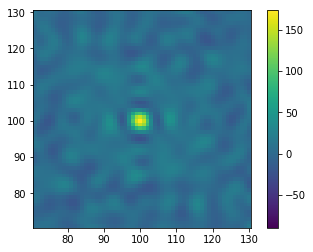

In [17]:
nx ,ny = np.shape(model_map2)
fig = plt.figure()
ax = fig.add_subplot(111)
im  = ax.imshow(model_map2)
wd = 30
plt.xlim(nx/2 - wd,  nx/2 + wd)
plt.ylim(ny/2 - wd,  ny/2 + wd)
fig.colorbar(im)
l2_lambda = 1e3
print(np.max(model_map2), np.max(model_map3), np.sum(model_map2), np.sum(model_map3))

173.5958566130896 162.03976895978033 25066.283014548084 0.0


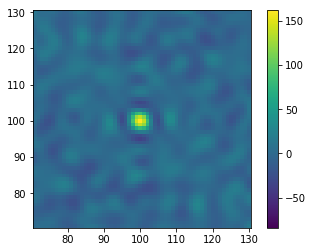

In [18]:
nx ,ny = np.shape(model_map3)
fig = plt.figure()
ax = fig.add_subplot(111)
im  = ax.imshow(model_map3)
wd = 30
plt.xlim(nx/2 - wd,  nx/2 + wd)
plt.ylim(ny/2 - wd,  ny/2 + wd)
fig.colorbar(im)
l2_lambda = 1e3
print(np.max(model_map2), np.max(model_map3), np.sum(model_map2), np.sum(model_map3))

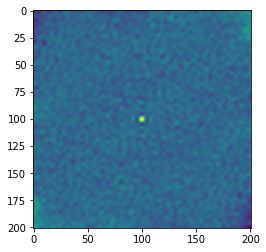

In [10]:
plt.imshow(model_map3)